## Null Hypotheses:

1) There is no significant difference in alcohol consumption between those who has other cancer and doesn't.

2) There is no significant difference in fruit consumption does between those who has other cancer and doesn't.

3) There is no significant difference in green vegetables consumption does between those who has other cancer and doesn't.

4) There is no significant difference in fried potato consumption does between those who has other cancer and doesn't.

5) There is no significant difference other cancer rate between smokers and non-smokers.

6) There is no significant difference other cancer rate between those who exercise and don't.

In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as stats
from pprint import pprint
from datetime import datetime
from pylab import *

from helpers import lin_reg
from helpers import box_plot

# File to Load (Remember to Change These)
csv_path = Path("../datasets/CVD_cleaned.csv")

data_df = pd.read_csv(csv_path)
data_df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Healthness_Score,Behaviour Score
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,...,150,32.66,14.54,Yes,0,30,16,12,5,3
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,...,165,77.11,28.29,No,0,30,0,4,4,3
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,...,163,88.45,33.47,No,4,12,3,16,5,4
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,...,180,93.44,28.73,No,0,30,30,8,4,5
4,Good,Within the past year,No,No,No,No,No,No,No,Male,...,191,88.45,24.37,Yes,0,8,4,0,6,4


In [2]:
# Get the unique values for 'Other_Cancer' column.
other_cancer_values = list(data_df['Other_Cancer'].unique())
other_cancer_values

['No', 'Yes']

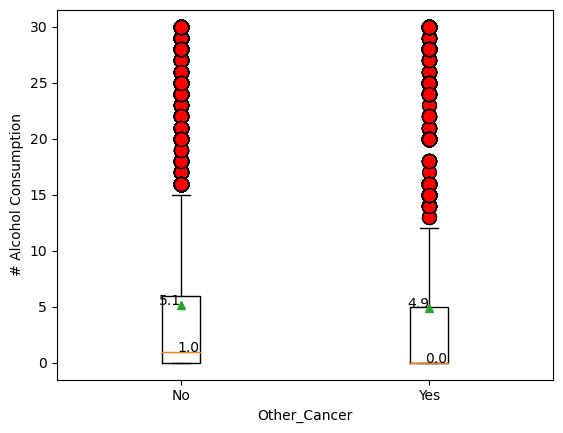

In [3]:
# Box plots for Alcohol_Consumption
ac_plot_dict = {}
for value in other_cancer_values:
    ac_plot_dict[value] = list(data_df.loc[data_df['Other_Cancer'] == value, :]['Alcohol_Consumption'])
    
box_plot(plt,ac_plot_dict,"Other_Cancer","# Alcohol Consumption", "output_data/alcohol_consumption_boxplot.jpg")


In [4]:
#data_df.boxplot("Alcohol_Consumption", by="Other_Cancer", figsize=(20, 10))
no_group = ac_plot_dict['No']
yes_group = ac_plot_dict['Yes']
result = stats.ttest_ind(no_group, yes_group, equal_var=False)
critial_value = 0.1
rejected = result.pvalue < critial_value
print(f'p-value: {result.pvalue}')
print(f'Sample size with other cancer: {len(yes_group)}.')
print(f'Sample size without other cancer: {len(no_group)}.')
if rejected:
    print(f"Null hypothesis is rejected since our p-value '{result.pvalue}' is lower than '{critial_value}'.")
else:
    print((f"Null hypothesis is not rejected since our p-value '{result.pvalue}' is higher than '{critial_value}'."))

p-value: 4.304196394782286e-06
Null hypothesis is rejected since our p-value '4.304196394782286e-06' is lower than '0.1'.


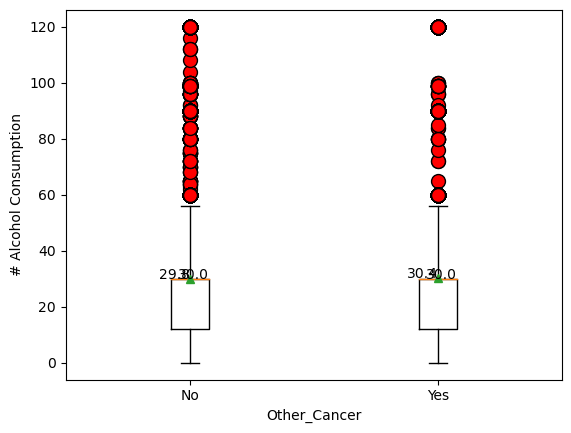

In [5]:
# Box plots for Fruit_Consumption
fc_plot_dict = {}
for value in other_cancer_values:
    fc_plot_dict[value] = list(data_df.loc[data_df['Other_Cancer'] == value, :]['Fruit_Consumption'])
    
box_plot(plt,fc_plot_dict,"Other_Cancer","# Alcohol Consumption", "output_data/fruit_consumption_boxplot.jpg")


In [6]:
#data_df.boxplot("Fruit_Consumption", by="Other_Cancer", figsize=(20, 10))
no_group = fc_plot_dict['No']
yes_group = fc_plot_dict['Yes']
result = stats.ttest_ind(no_group, yes_group, equal_var=False)
critial_value = 0.1
rejected = result.pvalue < critial_value
print(f'p-value: {result.pvalue}')
if rejected:
    print(f"Null hypothesis is rejected since our p-value '{result.pvalue}' is lower than '{critial_value}'.")
else:
    print((f"Null hypothesis is not rejected since our p-value '{result.pvalue}' is higher than '{critial_value}'."))

p-value: 9.884615904353926e-06
Null hypothesis is rejected since our p-value '9.884615904353926e-06' is lower than '0.1'.


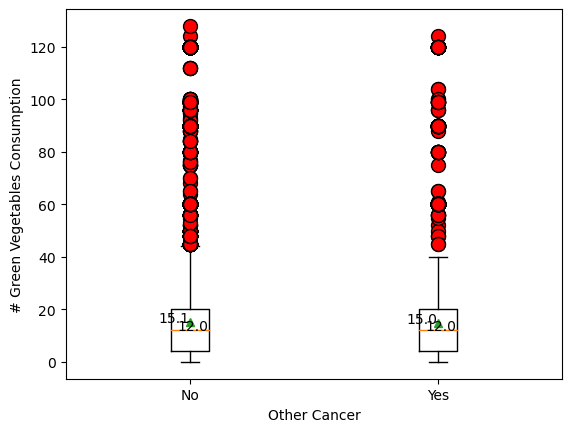

In [7]:
#Box plots for Green_Vegetables_Consumption

gvc_plot_dict = {}
for value in other_cancer_values:
    gvc_plot_dict[value] = list(data_df.loc[data_df['Other_Cancer'] == value, :]['Green_Vegetables_Consumption'])
    
box_plot(plt, gvc_plot_dict,"Other Cancer","# Green Vegetables Consumption", "output_data/green_vegetables_boxplot.jpg")

In [8]:
#data_df.boxplot("Green_Vegetables_Consumption", by="Other_Cancer", figsize=(20, 10))
no_group = gvc_plot_dict['No']
yes_group = gvc_plot_dict['Yes']
result = stats.ttest_ind(no_group, yes_group, equal_var=False)
critial_value = 0.1
rejected = result.pvalue < critial_value
print(f'p-value: {result.pvalue}')
if rejected:
    print(f"Null hypothesis is rejected since our p-value '{result.pvalue}' is lower than '{critial_value}'.")
else:
    print((f"Null hypothesis is not rejected since our p-value '{result.pvalue}' is higher than '{critial_value}'."))

p-value: 0.06210629800845825
Null hypothesis is rejected since our p-value '0.06210629800845825' is lower than '0.1'.


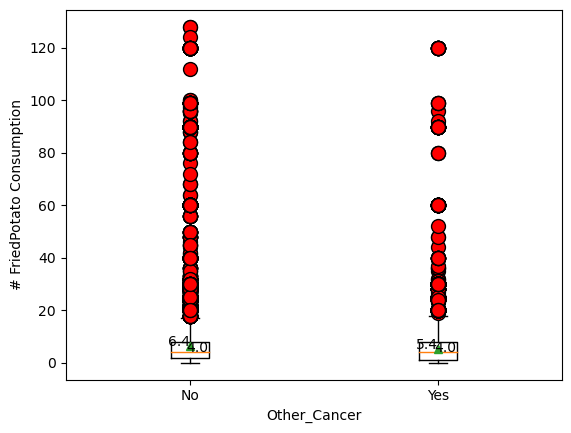

In [9]:
#Box plots for FriedPotato_Consumption

fpc_plot_dict = {}
for value in other_cancer_values:
    fpc_plot_dict[value] = list(data_df.loc[data_df['Other_Cancer'] == value, :]['FriedPotato_Consumption'])
    
box_plot(plt, fpc_plot_dict,"Other_Cancer","# FriedPotato Consumption", "output_data/fried_potato_consumption_boxplot.jpg")

In [10]:
#data_df.boxplot("FriedPotato_Consumption", by="Other_Cancer", figsize=(20, 10))
no_group = fpc_plot_dict['No']
yes_group = fpc_plot_dict['Yes']
result = stats.ttest_ind(no_group, yes_group, equal_var=False)
critial_value = 0.1
rejected = result.pvalue < critial_value
print(f'p-value: {result.pvalue}')
if rejected:
    print(f"Null hypothesis is rejected since our p-value '{result.pvalue}' is lower than '{critial_value}'.")
else:
    print((f"Null hypothesis is not rejected since our p-value '{result.pvalue}' is higher than '{critial_value}'."))

p-value: 2.687330621633897e-85
Null hypothesis is rejected since our p-value '2.687330621633897e-85' is lower than '0.1'.


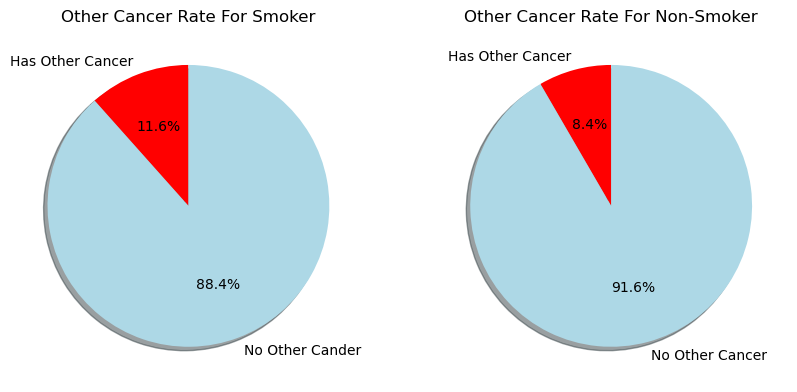

In [11]:
#Pie charts for Smoking_History

smoker_df = data_df.loc[data_df['Smoking_History'] == "Yes", :]
non_smoker_df = data_df.loc[data_df['Smoking_History'] == "No", :]

smoker_with_oc_df = smoker_df.loc[smoker_df['Other_Cancer'] == 'Yes', :]
smoker_without_oc_df = smoker_df.loc[smoker_df['Other_Cancer'] == 'No', :]

smoker_count = len(smoker_df.index)
smoker_with_oc_count = len(smoker_with_oc_df.index)
smoker_without_oc_count = len(smoker_without_oc_df.index)

smoker_with_oc_percentage = smoker_with_oc_count/smoker_count
smoker_without_oc_percentage = smoker_without_oc_count/smoker_count

non_smoker_with_oc_df = non_smoker_df.loc[non_smoker_df['Other_Cancer'] == 'Yes', :]
non_smoker_without_oc_df = non_smoker_df.loc[non_smoker_df['Other_Cancer'] == 'No', :]

non_smoker_count = len(non_smoker_df.index)
non_smoker_with_oc_count = len(non_smoker_with_oc_df.index)
non_smoker_without_oc_count = len(non_smoker_without_oc_df.index)

non_smoker_with_oc_percentage = non_smoker_with_oc_count/non_smoker_count
non_smoker_without_oc_percentage = non_smoker_without_oc_count/non_smoker_count

colors = ["red","lightblue"]

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))

ax1.pie([smoker_with_oc_percentage, smoker_without_oc_percentage], labels=['Has Other Cancer','No Other Cander'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
ax1.set_title('Other Cancer Rate For Smoker')

ax2.pie([non_smoker_with_oc_percentage, non_smoker_without_oc_percentage], labels=['Has Other Cancer','No Other Cancer'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
ax2.set_title('Other Cancer Rate For Non-Smoker')

plt.savefig("output_data/smoking_history_pie_chart.jpg")
plt.show()


In [12]:
#Chi square for smoker analysis:

observed_data = [
    [smoker_with_oc_count, smoker_without_oc_count], [non_smoker_with_oc_count, non_smoker_without_oc_count]
] # a 2x2 matrix
chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed_data)
print("Chi2 Stat:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)
critial_value = 0.1
rejected = p_value < critial_value
print(f'p-value: {p_value}')
if rejected:
    print(f"Null hypothesis is rejected since our p-value '{p_value}' is lower than '{critial_value}'.")
else:
    print((f"Null hypothesis is not rejected since our p-value '{p_value}' is higher than '{critial_value}'."))

Chi2 Stat: 881.3740930303389
P-value: 1.098793334337905e-193
Degrees of Freedom: 1
Expected Frequencies Table:
[[ 12117.82198709 113146.17801291]
 [ 17760.17801291 165829.82198709]]
p-value: 1.098793334337905e-193
Null hypothesis is rejected since our p-value '1.098793334337905e-193' is lower than '0.1'.


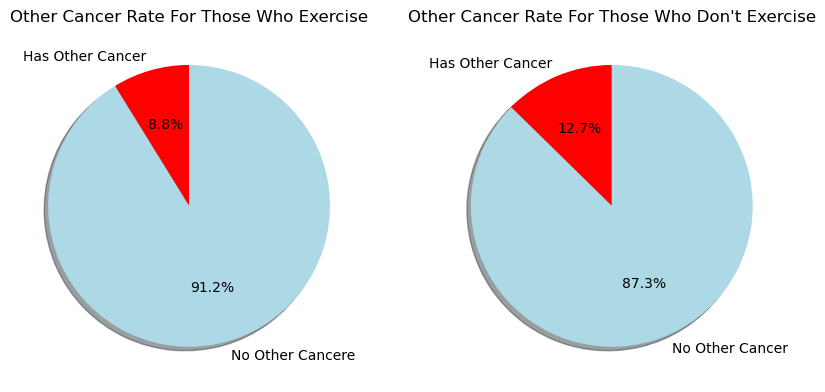

In [13]:
#Pie charts for Exercise
group1 = data_df.loc[data_df['Exercise'] == "Yes", :]


group1_yes = group1.loc[group1['Other_Cancer'] == 'Yes', :]
group1_no = group1.loc[group1['Other_Cancer'] == 'No', :]

group1_count = len(group1.index)
group1_yes_percent = len(group1_yes.index)/group1_count
group1_no_percent = len(group1_no.index)/group1_count

group2 = data_df.loc[data_df['Exercise'] == "No", :]

group2_yes = group2.loc[group2['Other_Cancer'] == 'Yes', :]
group2_no = group2.loc[group2['Other_Cancer'] == 'No', :]

group2_count = len(group2.index)
group2_yes_percent = len(group2_yes.index)/group2_count
group2_no_percent = len(group2_no.index)/group2_count

colors = ["red","lightblue"]

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))

ax1.pie([group1_yes_percent, group1_no_percent], labels=['Has Other Cancer','No Other Cancere'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
ax1.set_title('Other Cancer Rate For Those Who Exercise')

ax2.pie([group2_yes_percent, group2_no_percent], labels=['Has Other Cancer','No Other Cancer'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
ax2.set_title('Other Cancer Rate For Those Who Don\'t Exercise')

plt.savefig("output_data/exercise_pie_chart.jpg")
plt.show()

In [14]:
#Chi square for exercise analysis:

observed_data = [
    [len(group1_yes.index), len(group1_no.index)], [len(group2_yes.index), len(group2_no.index)]
] # a 2x2 matrix
chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed_data)
print("Chi2 Stat:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)
critial_value = 0.1
rejected = p_value < critial_value
print(f'p-value: {p_value}')
if rejected:
    print(f"Null hypothesis is rejected since our p-value '{p_value}' is lower than '{critial_value}'.")
else:
    print((f"Null hypothesis is not rejected since our p-value '{p_value}' is higher than '{critial_value}'."))

Chi2 Stat: 913.1696279020902
P-value: 1.3456273865932247e-200
Degrees of Freedom: 1
Expected Frequencies Table:
[[ 23157.30253777 216223.69746223]
 [  6720.69746223  62752.30253777]]
p-value: 1.3456273865932247e-200
Null hypothesis is rejected since our p-value '1.3456273865932247e-200' is lower than '0.1'.


## Results

There IS a significant difference in alcohol consumption between those who has other cancer and doesn't.

There IS a significant difference in fruit consumption does between those who has other cancer and doesn't.

There IS a significant difference in green vegetables consumption does between those who has other cancer and doesn't.

There IS a significant difference in fried potato consumption does between those who has other cancer and doesn't.

There IS a significant difference other cancer rate between smokers and non-smokers.

There IS a significant difference other cancer rate between those who exercise and don't.

## Results

The alcohol consumption is higher on people without other cancer.

The fruit consumption is higher on people without other cancer.

The green vegetables consumption is higher on people without other cancer.

The fried potato consumption is higher on people without other cancer.

Smokers has a higher rate of other cancer.

People who don’t exercise has a higher rate of cancer.